In [1]:
# Makes print and division act like Python 3
from __future__ import print_function, division

# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Enable inline plotting at lower left
%matplotlib inline
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'none'

# seaborn package for making pretty plots, but not necessary
try:
    import seaborn as sns
    params =   {'xtick.direction': 'in', 'ytick.direction': 'in', 'font.family': ['serif'],
                'text.usetex': True, 'text.latex.preamble': ['\usepackage{gensymb}']}
    sns.set_style("ticks", params)
except ImportError:
    print('Seaborn module is not installed.')
    
from IPython.display import display, Latex, clear_output

In [2]:
import pynrc
from pynrc import nrc_utils
from pynrc.nrc_utils import (webbpsf, poppy, pix_noise, S)

In [32]:
#nrc = pynrc.NIRCam('F335M', mask='MASK335R', pupil='CIRCLYOT', offset_r=5, fov_pix=320)
nrc = pynrc.NIRCam('F335M', mask=None, pupil='CIRCLYOT', ND_acq=False)

[     pynrc:INFO] Initializing SCA 485/A5
[     pynrc:INFO] RAPID readout mode selected.
[     pynrc:INFO] Setting nf=1, nd1=0, nd2=0, nd3=0.
[     pynrc:INFO] Updating PSF with oversample=4 and fov_pix=31


In [33]:
nrc.update_detectors(nint=10, ngroup=2, verbose=True, wind_mode='WINDOW', xpix=64, ypix=64)

[     pynrc:INFO] Initializing SCA 485/A5
[     pynrc:INFO] RAPID readout mode selected.
[     pynrc:INFO] Setting nf=1, nd1=0, nd2=0, nd3=0.
New Ramp Settings:
  read_mode :    RAPID
  nf        :        1
  nd2       :        0
  ngroup    :        2
  nint      :       10
New Detector Settings
  wind_mode :   WINDOW
  xpix      :       64
  ypix      :       64
  x0        :        0
  y0        :        0
New Ramp Times
  t_group   :    0.050
  t_frame   :    0.050
  t_int     :    0.100
  t_exp     :    1.003
  t_acq     :    1.505


In [34]:
print(nrc.det_info)
print(nrc.psf_info)
print(nrc.multiaccum_times)

{u'nint': 10, u'nd3': 0, u'nf': 1, u'read_mode': u'RAPID', u'ypix': 64, u'ngroup': 2, u'nd1': 0, u'y0': 0, u'x0': 0, u'nd2': 0, u'wind_mode': 'WINDOW', u'xpix': 64}
{u'opd': (u'OPD_RevV_nircam_132.fits', 0), u'oversample': 4, u'fov_pix': 31, u'offset_theta': 0, u'save': True, u'offset_r': 0}
{u't_frame': 0.050160000000000003, u't_int': 0.10032000000000001, u't_exp': 1.0032000000000001, u't_acq': 1.5047999999999999, u't_group': 0.050160000000000003}


In [35]:
out = nrc.sensitivity(verbose=True, units='vegamag')

2.64611312893 2.0305201715
Point Source Sensitivity (10-sigma): 11.75 vegamag
Surface Brightness Sensitivity (10-sigma): 12.61 vegamag/arcsec^2


({u'Spectrum': u'Flat spectrum in photlam',
  u'nsig': 10,
  u'sensitivity': 11.749065072963475,
  u'units': 'vegamag'},
 {u'Spectrum': u'Flat spectrum in photlam',
  u'nsig': 10,
  u'sensitivity': 12.607614457770815,
  u'units': u'vegamag/arcsec^2'})

In [36]:
out = nrc.sat_limits(verbose=True)

F335M Saturation Limit assuming G2V source: 4.45


{u'Spectrum': u'G2V',
 u'bp_lim': 'F335M',
 u'satmag': 4.448988968931777,
 u'units': u'vegamag'}

In [15]:
nrc.update_detectors(wind_mode='WINDOW', xpix=320, ypix=320, read_mode='RAPID', ngroup=2, nint=1)
bp_k = S.ObsBandpass('johnson,k'); bp_k.name = 'K-Band'
satlim = nrc.sat_limits(pynrc.stellar_spectrum('A0V'), bp_k, verbose=True)

[     pynrc:INFO] Initializing SCA 485/A5
[     pynrc:INFO] RAPID readout mode selected.
[     pynrc:INFO] Setting nf=1, nd1=0, nd2=0, nd3=0.
K-Band Saturation Limit for F335M assuming A0V source: -0.12


In [4]:
sp = nrc_utils.stellar_spectrum('G2V', 16, 'vegamag', nrc.bandpass)

In [5]:
d = nrc.sensitivity(verbose=True, nsig=5, sp=sp, forwardSNR=True)
#s2['sensitivity'] / s1['sensitivity']

F322W2 SNR for G2V source:
Wave    SNR     Flux (uJy)
2.40     0.36  214.98
2.50    11.59  197.83
2.60    12.94  189.99
2.70    13.57  178.50
2.80    13.90  167.69
2.90    13.51  158.06
3.00    12.13  147.59
3.10    11.45  140.87
3.20    12.26  133.22
3.30    12.49  124.32
3.40    12.22  119.61
3.50    11.63  112.57
3.60    11.40  107.56
3.70    10.85  102.33
3.80    10.23   98.13
3.90     9.37   93.64
4.00     6.67   89.26


In [9]:
# Initiate NIRCam observation
pynrc.setup_logging('WARN', verbose=False)
nrc = pynrc.NIRCam('F322W2', pupil='GRISM0', ngroup=9, nf=1, nd2=0, nint=1, read_mode='RAPID')
print(nrc.multiaccum_times)
pynrc.setup_logging('DEBUG', verbose=False)
%time bglim = nrc.sensitivity(verbose=True, zfact=5, nsig=5)

{u't_frame': 10.73677, u't_int': 96.63093, u't_exp': 96.63093, u't_acq': 107.3677, u't_group': 10.73677}
[     pynrc:DEBUG] fov_pix=31, oversample=4
[     pynrc:DEBUG] Took 1.58 seconds to generate images
F322W2 Background Sensitivity (5-sigma) for Flat spectrum in photlam source:
Wave   Limit (uJy)
2.40   3643.36
2.50     89.21
2.60     74.73
2.70     66.61
2.80     60.88
2.90     59.27
3.00     62.69
3.10     64.07
3.20     55.98
3.30     51.18
3.40     50.47
3.50     50.37
3.60     49.08
3.70     49.52
3.80     50.74
3.90     53.45
4.00     74.06
CPU times: user 3 s, sys: 1.58 s, total: 4.58 s
Wall time: 2.04 s


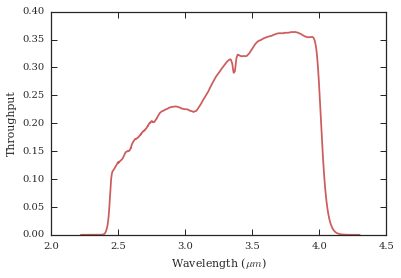

In [13]:
nrc.plot_bandpass()

In [8]:
bp = nrc.bandpass
dw = bp.wave[1]-bp.wave[0]
warr = np.concatenate(([bp.wave.min()-dw],bp.wave,[bp.wave.max()+dw]))
tarr = np.concatenate(([0],bp.throughput,[0]))
bp2 = S.ArrayBandpass(warr, tarr, name=bp.name)

In [9]:
sp1 = pynrc.stellar_spectrum('G2V', 10, 'vegamag', bp)
sp2 = pynrc.stellar_spectrum('G2V', 10, 'vegamag', bp2)
print(sp1(5000), sp2(5000))

0.0121049961879 0.0121049961879


In [6]:
satlims = nrc.sat_limits(verbose=True)

[     pynrc:DEBUG] Took 0.02 seconds to generate images
[     pynrc:DEBUG] Total Source Count Rate for F430M = 10.0 mags: 186078 e-/sec
[     pynrc:DEBUG] Magnitude in F430M band: 10.00
[     pynrc:DEBUG] Approximate Time to 0.80 of Saturation: 2.77 sec
F430M Saturation Limit assuming G2V source: 13.86


In [6]:
bglim = nrc.sensitivity(verbose=True, zfact=1.2)

[     pynrc:DEBUG] zfact:1.2
[     pynrc:DEBUG] fov_pix=11, oversample=4
220290.885691
[     pynrc:DEBUG] Mag Limits [5.00,34.00]; 10-sig: 24.52
[     pynrc:DEBUG] Mag Limits [23.52,25.47]; 10-sig: 24.41
Sensitivity (10-sigma): 323.73 nJy


In [19]:
nrc._psf_info

{u'fov_pix': 33, u'oversample': 4}

In [17]:
test = pynrc.nrc_utils.bg_sensitivity(bp, ngroup=5, nint=10, nd2=12, nf=8, quiet=False, units='nJy', 
                                      rn=10, p_excess=(1.5,10), nsig=10, zfact=5, idark=0.03,
                                      coeff=coeff, fov_pix=fov, oversample=os, simple=True)

Sensitivity (10-sigma): 56.39 nJy


In [6]:
test = pynrc.nrc_utils.bg_sensitivity('F322W2', 'GRISM0', ngroup=93, quiet=False, 
                                      rn=10, zfact=3, p_excess=(1.5,10), nsig=5)

[     pynrc:DEBUG] Reading file: F322W2_nircam_plus_ote_throughput_moda_sorted.txt
[     pynrc:DEBUG] zfact:3.0
[     pynrc:DEBUG] fov_pix=11, oversample=4
[     pynrc:DEBUG] nprocessors: 17; npsf: 51
[     pynrc:DEBUG] Took 2.46 seconds to generate coefficients
F322W2 Background Sensitivity assuming Flat spectrum in photlam source:
Wave	Limit (uJy)
2.40	18.08
2.50	0.42 
2.60	0.35 
2.70	0.31 
2.80	0.29 
2.90	0.28 
3.00	0.29 
3.10	0.30 
3.20	0.26 
3.30	0.24 
3.40	0.24 
3.50	0.24 
3.60	0.23 
3.70	0.23 
3.80	0.24 
3.90	0.25 
4.00	0.35 


In [7]:
# Initiate NIRCam observation
pynrc.setup_logging('DEBUG', verbose=False)
nrc = pynrc.NIRCam('F444W', pupil='GRISM0', ngroup='2', ypix=64, wind_mode='STRIPE')
# Define stellar spectral type (pysynphot wrapper)
sp_A0V = pynrc.stellar_spectrum('A0V') 
# Pynsynphot K-Band bandpass
bp_k = S.ObsBandpass('johnson,k'); bp_k.name = 'K-Band'
%time maglim = nrc.sat_limits(pynrc.stellar_spectrum('M2V'), bp_k, verbose=True)

[     pynrc:DEBUG] Reading file: F444W_nircam_plus_ote_throughput_moda_sorted.txt
[     pynrc:INFO] Initializing SCA 485/A5
[     pynrc:INFO] RAPID readout mode selected.
[     pynrc:INFO] Setting nf=1, nd1=0, nd2=0, nd3=0.
[     pynrc:DEBUG] Updating PSF with oversample=4 and fov_pix=31
[     pynrc:DEBUG] nprocessors: 15; npsf: 29
[     pynrc:DEBUG] Took 1.83 seconds to generate coefficients
[     pynrc:DEBUG] Took 3.09 seconds to generate images
[     pynrc:DEBUG] Total Source Count Rate for K-Band = 10.0 mags: 653713 e-/sec
[     pynrc:DEBUG] Magnitude in F444W band: 9.77
[     pynrc:DEBUG] Approximate Time to 0.80 of Saturation: 192.8 sec
K-Band Saturation Limit for F444W assuming M2V source:
Wave	Sat Lim (vegamag)
3.90	3.64
4.00	3.62
4.10	3.50
4.20	3.39
4.30	3.25
4.40	3.08
4.50	2.86
4.60	2.71
4.70	2.58
4.80	2.43
4.90	2.22
5.00	1.51
CPU times: user 2.01 s, sys: 1.4 s, total: 3.42 s
Wall time: 3.43 s


In [14]:
sp_M2V = pynrc.stellar_spectrum('M2V') 
%time maglim = nrc.sat_limits(sp_M2V, bp_k, verbose=True)

[     pynrc:DEBUG] Took 2.97 seconds to generate image
[     pynrc:DEBUG] Total Source Count Rate for K-Band = 0.0 mags: 0 e-/sec
[     pynrc:DEBUG] Magnitude in F444W band: 2.50
[     pynrc:DEBUG] Approximate Time to 0.80 of Saturation: 1274640152.1 sec
K-Band Saturation Limit for F444W assuming M2V source:
Wave	Sat Lim (vegamag)
3.90	3.64
4.00	3.63
4.10	3.51
4.20	3.39
4.30	3.26
4.40	3.09
4.50	2.87
4.60	2.72
4.70	2.58
4.80	2.43
4.90	2.23
5.00	1.51
CPU times: user 1.75 s, sys: 1.34 s, total: 3.09 s
Wall time: 3.09 s


In [16]:
nrc.filter='F430M'
nrc.pupil='GRISM0'
%time maglim = nrc.sat_limits(sp_A0V, bp_k, verbose=True)

[     pynrc:DEBUG] Reading file: F430M_nircam_plus_ote_throughput_moda_sorted.txt
[     pynrc:DEBUG] Updating PSF
[     pynrc:DEBUG] nprocessors: 8; npsf: 8
[     pynrc:DEBUG] Took 0.71 seconds to generate coefficients
[     pynrc:DEBUG] Took 0.61 seconds to generate image
[     pynrc:DEBUG] Total Source Count Rate for K-Band = 0.0 mags: 0 e-/sec
[     pynrc:DEBUG] Magnitude in F430M band: 3.41
[     pynrc:DEBUG] Approximate Time to 0.80 of Saturation: 2209205991.1 sec
K-Band Saturation Limit for F430M assuming A0V source:
Wave	Sat Lim (vegamag)
4.20	3.28
4.30	3.15
4.40	2.89
CPU times: user 3.71 s, sys: 311 ms, total: 4.02 s
Wall time: 651 ms


In [8]:
maglim = nrc.sat_limits(sp_A0V, bp_k, verbose=True)

K-Band Saturation Limit for F322W2 assuming A0V source:
Wave	Sat Lim (abmag)
2.40	5.28
2.50	6.87
2.60	6.97
2.70	7.03
2.80	7.03
2.90	6.96
3.00	6.85
3.10	6.72
3.20	6.78
3.30	6.77
3.40	6.73
3.50	6.64
3.60	6.60
3.70	6.52
3.80	6.43
3.90	6.31
4.00	6.14


In [17]:
maglim = nrc.sat_limits(sp_M2V, bp_k, verbose=True)

K-Band Limiting Magnitude for F322W2 assuming M2V source:
Wave	Mag Lim
2.40	2.79
2.50	4.26
2.60	4.50
2.70	4.42
2.80	4.49
2.90	4.38
3.00	4.31
3.10	4.19
3.20	4.33
3.30	4.35
3.40	4.29
3.50	4.26
3.60	4.21
3.70	4.16
3.80	4.09
3.90	3.98
4.00	3.81
